In [1]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2


# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [2]:
hog.nbins

9

In [3]:
# loop over the image paths
'''
def calc_hog(imagePath):
	# load the image and resize it to (1) reduce detection time
	# and (2) improve detection accuracy
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=min(400, image.shape[1]))
	orig = image.copy()
	# detect people in the image
	st = time.time()
	(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)
	# draw the original bounding boxes
	for (x, y, w, h) in rects:
		cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
	# apply non-maxima suppression to the bounding boxes using a
	# fairly large overlap threshold to try to maintain overlapping
	# boxes that are still people
	rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
	pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    return pick
	# show the output images
	#cv2.imshow("Before NMS", orig)
	#cv2.imshow("After NMS", image)
	#cv2.waitKey(0)
    '''

'\ndef calc_hog(imagePath):\n\t# load the image and resize it to (1) reduce detection time\n\t# and (2) improve detection accuracy\n\timage = cv2.imread(imagePath)\n\timage = imutils.resize(image, width=min(400, image.shape[1]))\n\torig = image.copy()\n\t# detect people in the image\n\tst = time.time()\n\t(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)\n\t# draw the original bounding boxes\n\tfor (x, y, w, h) in rects:\n\t\tcv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)\n\t# apply non-maxima suppression to the bounding boxes using a\n\t# fairly large overlap threshold to try to maintain overlapping\n\t# boxes that are still people\n\trects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])\n\tpick = non_max_suppression(rects, probs=None, overlapThresh=0.65)\n    return pick\n\t# show the output images\n\t#cv2.imshow("Before NMS", orig)\n\t#cv2.imshow("After NMS", image)\n\t#cv2.waitKey(0)\n    '

In [3]:
def calc_hog(img_path):
    
    image = cv2.imread(img_path)
    image = imutils.resize(image, width=min(640, image.shape[1]))
    orig = image.copy()
    st = time.time()
    (rects, weights) = hog.detectMultiScale(image, winStride=(8, 8),padding=(8, 8), scale=1.1)
    print(time.time()-st)
    return rects, orig
    

In [5]:
   '''
	# draw the final bounding boxes
	for (xA, yA, xB, yB) in pick:
		cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
	# show some information on the number of bounding boxes
	filename = imagePath[imagePath.rfind("/") + 1:]
	print("[INFO] {}: {} original boxes, {} after suppression".format(
		filename, len(rects), len(pick)))
    '''

'\n\t# draw the final bounding boxes\n\tfor (xA, yA, xB, yB) in pick:\n\t\tcv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)\n\t# show some information on the number of bounding boxes\n\tfilename = imagePath[imagePath.rfind("/") + 1:]\n\tprint("[INFO] {}: {} original boxes, {} after suppression".format(\n\t\tfilename, len(rects), len(pick)))\n '

In [8]:
## define image paths
img_path = '/media/dtu-project2/2GB_HDD/Detection_HOG_SVM/dataset/neg_pos_imgs_for_hog_svm_unsen/pos2/10882.jpg'


0.01994776725769043
0.035213470458984375


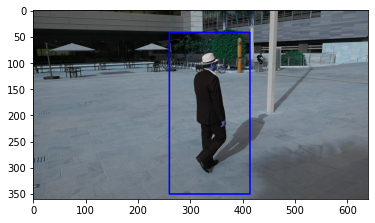

[[260  42 154 308]]


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

st = time.time()
rects, orig = calc_hog(img_path)
print(time.time()-st)
#orig = cv2.imread(img_path)
for (x, y, w, h) in rects:
		cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.imshow(orig)
plt.show()

print(rects)